In [1]:
from AppalachianRL.envs.trail import AppalachianTrailEnv


env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()


Day 1: 2191.0 miles left | Energy 91.0 | Food 9.2 | Weather 0
Day 2: 2173.0 miles left | Energy 67.2 | Food 8.2 | Weather 1
Day 3: 2173.0 miles left | Energy 100.0 | Food 7.7 | Weather 0
Day 4: 2149.0 miles left | Energy 65.4 | Food 6.5 | Weather 1
Day 5: 2147.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 6: 2130.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 7: 2090.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
Day 8: 2082.0 miles left | Energy 88.0 | Food 9.2 | Weather 2
Day 9: 2073.0 miles left | Energy 79.0 | Food 8.4 | Weather 0
Day 10: 2055.0 miles left | Energy 55.2 | Food 7.4 | Weather 1
Day 11: 2047.0 miles left | Energy 47.2 | Food 6.6 | Weather 0
Day 12: 2031.0 miles left | Energy 29.6 | Food 5.6 | Weather 0
Day 13: 2021.0 miles left | Energy 19.6 | Food 4.8 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 14: 1993.0 miles left | Energy 41.6 | Food 4


Training Q-Learning...
Episode 50/500 | Reward: 96.2
Episode 100/500 | Reward: 92.7
Episode 150/500 | Reward: 33.5
Episode 200/500 | Reward: 156.3
Episode 250/500 | Reward: 41.7
Episode 300/500 | Reward: 201.5
Episode 350/500 | Reward: 58.0
Episode 400/500 | Reward: 53.5
Episode 450/500 | Reward: 40.1
Episode 500/500 | Reward: 186.0

Training SARSA...
Episode 50/500 | Reward: 32.2
Episode 100/500 | Reward: 32.2
Episode 150/500 | Reward: 96.4
Episode 200/500 | Reward: 55.8
Episode 250/500 | Reward: 34.5
Episode 300/500 | Reward: 59.3
Episode 350/500 | Reward: 67.5
Episode 400/500 | Reward: 121.4
Episode 450/500 | Reward: 64.3
Episode 500/500 | Reward: 142.4

Training Policy Gradient...
Episode 50/500 | Reward: 20.5
Episode 100/500 | Reward: 17.5
Episode 150/500 | Reward: 19.5
Episode 200/500 | Reward: 25.5
Episode 250/500 | Reward: 24.5
Episode 300/500 | Reward: 27.5
Episode 350/500 | Reward: 19.5
Episode 400/500 | Reward: 22.5
Episode 450/500 | Reward: 28.5
Episode 500/500 | Reward: 2

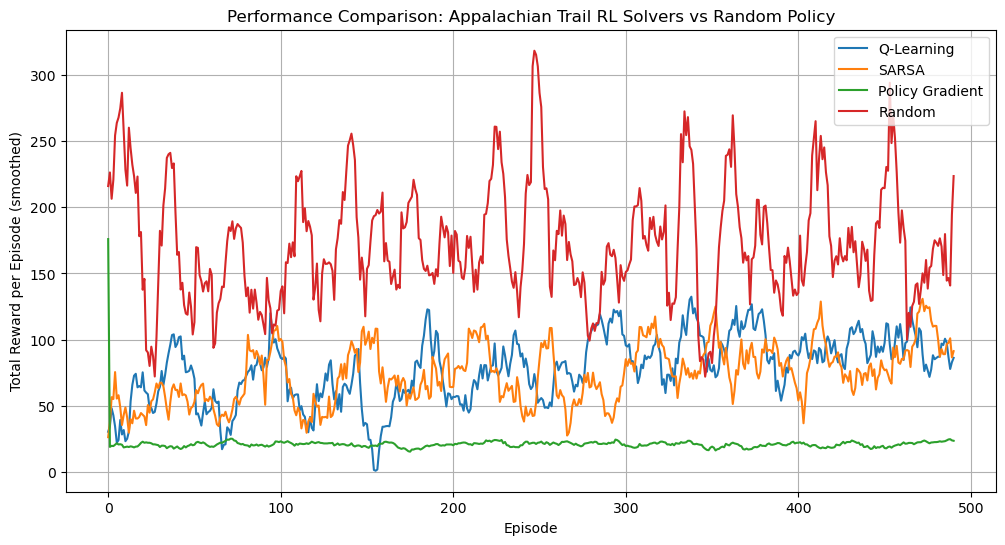

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
# env = AppalachianTrailEnv(seed=SEED)
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED)
}

# ---------------------------
# Random baseline
# ---------------------------
class RandomAgent:
    def __init__(self, env, seed=None):
        self.env = env
        self.rng = np.random.default_rng(seed)

    def train(self, episodes=1000):
        rewards = []
        for ep in range(episodes):
            state, _ = self.env.reset()
            done = False
            total_r = 0
            while not done:
                action = self.env.action_space.sample()
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                total_r += reward
                state = next_state
            rewards.append(total_r)
        return rewards

solvers["Random"] = RandomAgent(env, seed=SEED)

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()



Training Q-Learning...
Episode 50/500 | Reward: 114.2
Episode 100/500 | Reward: 146.6
Episode 150/500 | Reward: 46.9
Episode 200/500 | Reward: 65.7
Episode 250/500 | Reward: 20.4
Episode 300/500 | Reward: 93.8
Episode 350/500 | Reward: 214.1
Episode 400/500 | Reward: 124.0
Episode 450/500 | Reward: 5.9
Episode 500/500 | Reward: 32.7

Training SARSA...
Episode 50/500 | Reward: 233.1
Episode 100/500 | Reward: 79.3
Episode 150/500 | Reward: -3.1
Episode 200/500 | Reward: 15.4
Episode 250/500 | Reward: 64.3
Episode 300/500 | Reward: -17.6
Episode 350/500 | Reward: 202.5
Episode 400/500 | Reward: 225.4
Episode 450/500 | Reward: 50.7
Episode 500/500 | Reward: 120.4

Training Policy Gradient...
Episode 50/500 | Reward: 16.7
Episode 100/500 | Reward: 13.4
Episode 150/500 | Reward: 34.1
Episode 200/500 | Reward: 28.1
Episode 250/500 | Reward: 16.3
Episode 300/500 | Reward: 28.2
Episode 350/500 | Reward: 29.2
Episode 400/500 | Reward: 21.1
Episode 450/500 | Reward: 37.2
Episode 500/500 | Reward

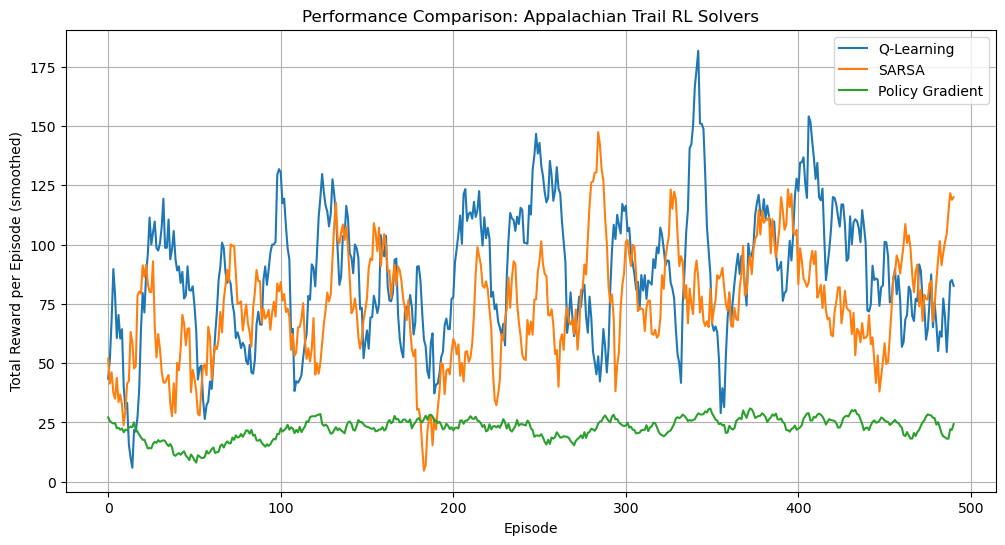

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()
